In [86]:
import numpy as np
import struct, os
# import pandas as pd
# import xarray as xr
# import geopandas as gpd
# import regionmask, struct
import matplotlib.pyplot as plt
# import rioxarray
from pyproj import Transformer
import cartopy.crs as ccrs
from xgrads import open_CtlDataset

In [29]:
obj = ccrs.LambertAzimuthalEqualArea(105, 47)
obj_proj = obj.to_string()

transformer = Transformer.from_crs('EPSG:4326', obj_proj)
transformer_inv = Transformer.from_crs(obj_proj, 'EPSG:4326')

workplace = './'

In [30]:
def load_gdat_files(n_rank, ncols=10, nrows = 10, ntime=365, 
                    varname='tair', path = '.', suffix='gdat', 
                    combine_all=False):

    import os

    for i, ii in enumerate(np.arange(n_rank)):

        bin_sub_path = os.path.join(path, varname + '_'+str(ii)+'.'+suffix)

        with open(bin_sub_path) as f:
            rectype = np.dtype(np.float32)
            bdata = np.fromfile(f, dtype=rectype)
            bdata = np.reshape(bdata, [ntime, int(bdata.shape[0] / ntime)])

        # print(bdata.shape)

        if i == 0: 
            dump = bdata.copy()
        else:
            dump = np.hstack((dump, bdata))

    if combine_all:

        with open(os.path.join(path, varname+'.'+suffix), 'wb') as file:
            
            for ix in np.arange(dump.shape[0]):
                for iy in dump[ix,:]:
            
                    binary_data = struct.pack("f", iy)
                
                    file.write(binary_data)

    dump = np.reshape(dump, [ntime, nrows, ncols])

    return dump


(181800,)
(60, 3030)
(3030, 60)
(181800,)
(60, 3030)
(6060, 60)
(175740,)
(60, 2929)
(8989, 60)


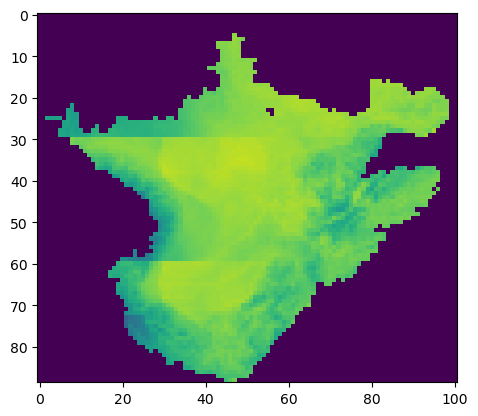

In [85]:
path    = './outputs/wo_assim/'
varname = 'tair'
suffix  = 'gdat'
ncols=101
nrows=89
ntime   = 60

for i, ii in enumerate(np.arange(3)):

    bin_sub_path = os.path.join(path, varname + '_'+str(ii)+'.'+suffix)

    with open(bin_sub_path) as f:
        rectype = np.dtype(np.float32)
        bdata = np.fromfile(f, dtype=rectype)
        print(bdata.shape)
        bdata = np.reshape(bdata, [ntime, int(bdata.shape[0] / ntime)])
        print(bdata.shape)

    # plt.imshow(dump)

    if i == 0: 
        dump = bdata.T.copy()
    else:
        dump = np.vstack((dump, bdata.T))

    print(dump.shape)

dump = np.reshape(dump, [nrows, ncols, ntime,  ])

plt.imshow(dump[:,:,0],vmin=-20, vmax=20)

In [71]:
(3030 + 3030 + 2929) / 89

101.0

In [40]:
data = load_gdat_files(3, ncols=101, nrows=89, ntime=60, 
                       path=workplace+'outputs/wo_assim/',
                       varname='tair', 
                       combine_all=True)

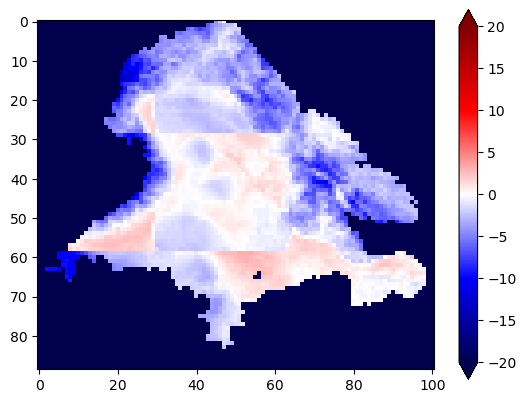

In [41]:
plt.imshow(np.flipud(data[30,:,:]),vmin=-20, vmax=20, cmap = 'seismic')
plt.colorbar(extend = 'both')

In [21]:
data = load_gdat_files(np.arange(10), ncols=485, nrows=513, ntime=365, 
                       path=workplace+'outputs/wo_assim/',
                       varname='tair', 
                       combine_all=True)

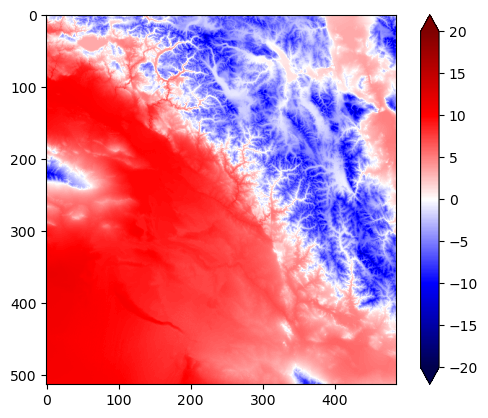

In [22]:
plt.imshow(np.flipud(data[45,:,:]),vmin=-20, vmax=20, cmap = 'seismic')
plt.colorbar(extend = 'both')